In [1]:
from abel.classes.collider.preset.halhf_v1 import HALHFv1

In [2]:
collider = HALHFv1()
collider.run('preset_example', overwrite=True)

>> LINAC #1
Tracked #0  SourceBasic             (s =  200.0 m) :   E =   5.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε = 158.7/0.6 mm-mrad
    ... #1  StageBasic #1           (s =  204.8 m) :   E =  35.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #2  InterstageBasic         (s =  213.9 m) :   E =  35.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #3  StageBasic #2           (s =  218.7 m) :   E =  66.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #4  InterstageBasic         (s =  231.1 m) :   E =  66.9 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #5  StageBasic #3           (s =  236.0 m) :   E =  97.8 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #6  InterstageBasic         (s =  250.9 m) :   E =  97.8 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  0.1%, ε = 158.6/0.6 mm-mrad
    ... #7  StageBasic #4           (s =  255.8 m) :   E 

In [3]:
collider.print_cost()

-- COSTS -----------------------------------------
-- Construction: 4311 MILCU
   -- Plasma linac: 2585 MILCU
      -- Driver complex: 2240 MILCU
         -- Source: 9 MILCU
         -- RF accelerator: 1063 MILCU
            -- RF structures (5598x): 684 MILCU
            -- Klystrons and modulators (1120x): 379 MILCU
         -- Turnaround: 754 MILCU
         -- Civil construction: 414 MILCU
      -- Source: 9 MILCU
      -- Plasma stages (16x): 15 MILCU
      -- Interstages: 35 MILCU
      -- BDS: 112 MILCU
      -- Civil construction: 172 MILCU
   -- RF linac: 1677 MILCU
      -- Source: 9 MILCU
      -- RF injector: 53 MILCU
      -- Damping ring: 48 MILCU
         -- Ring components: 30 MILCU
         -- Civil construction: 18 MILCU
      -- RF accelerator: 449 MILCU
         -- RF structures (2044x): 250 MILCU
         -- Klystrons and modulators (409x): 199 MILCU
      -- Turnaround: 754 MILCU
      -- BDS: 28 MILCU
      -- Civil construction: 335 MILCU
   -- Interaction point:

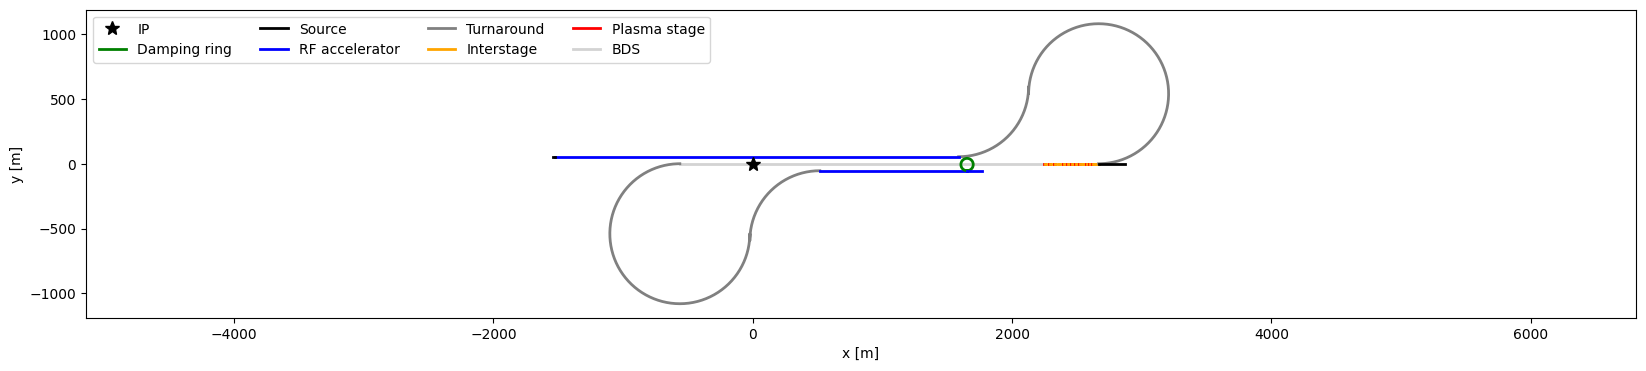

In [4]:
collider.plot_survey()